# Fractal de Newton

## Ejercicio

Utilizar la librería FFTW para calcular el espectro de potencias para cada condición inicial. Luego calcular el espectro de potencias promedio. Hay frecuencias dominantes?

    Updating registry at `C:\Users\willi\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\willi\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\willi\.julia\environments\v1.11\Manifest.toml`


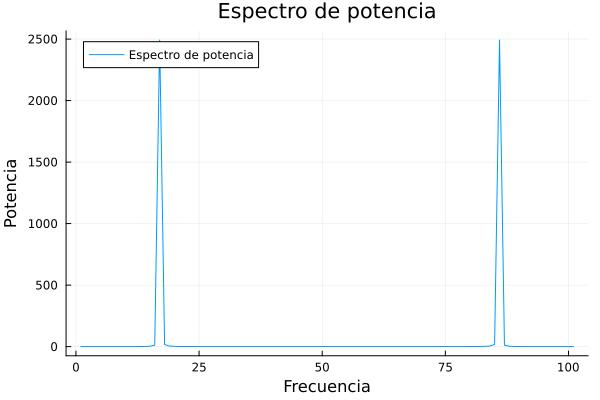

In [1]:
using FFTW
using Plots

# Señal de juguete o serie de puntos
x = 0.0:0.1:10
signal = sin.(10*x)

# Definición de espectro de potencia
dft = abs.(fft(signal)).^2

using Plots

# Graficar la señal
plot(x, signal, label="Señal", xlabel="x", ylabel="y", title="Señal de juguete")

# Graficar el espectro de potencia
plot(dft, label="Espectro de potencia", xlabel="Frecuencia", ylabel="Potencia", title="Espectro de potencia")

# Ejercicio

Crear una lista con tuplas que contengan la condición inicial usada y la etiqueta de la raíz a la que convegió el método para $x^2+4=0$. Si es posible, graficar con heatmap los resultados.

In [2]:
# creamos una malla de números complejos, uso ; para evitar 
iniciales = [x + y*im for x in -2:0.001:2, y in -2:0.001:2];
f(x) = x - (x^4+4)/(4*x^3)#metodo de Newton_Raphson
iterator = deepcopy(iniciales)
[iterator .= f.(iterator) for i in 1:100]
iterator

4001×4001 Matrix{ComplexF64}:
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1

In [3]:
# Primero un vecort que contenga las raices.
#raices = [x+im*y for x in -1:2:1, y in -1:2:1]
raices = [-1-1im, 1-1im, 1+1im, -1+1im]

4-element Vector{Complex{Int64}}:
 -1 - 1im
  1 - 1im
  1 + 1im
 -1 + 1im

In [4]:
# Ahora creamos una función que nos identifique las raices y asigne un cero cuando los valores no convergen.
function convert_root(root)
    tolerance = 1e-6
    if abs(root-raices[1]) < tolerance
        return 1
    elseif abs(root-raices[2]) < tolerance
        return 2
    elseif abs(root-raices[3]) < tolerance
        return 3
    elseif abs(root-raices[4]) < tolerance
        return 4
    else
        return 0
    end
end

convert_root (generic function with 1 method)

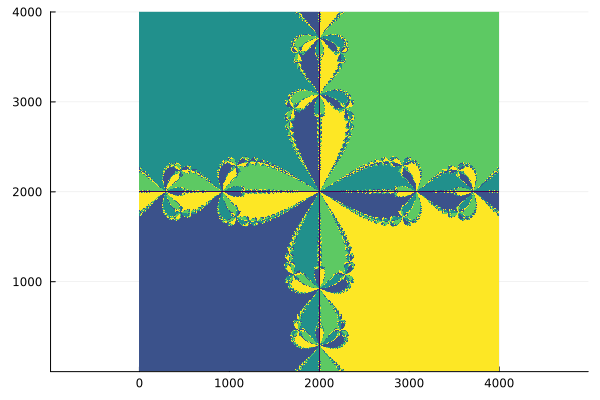

In [5]:
# Aplicamos la función al arreglo
toplot = convert_root.(iterator)

#heatmap
heatmap(toplot, c=:viridis, aspect_ratio=1, color=:grays, legend=false)

In [15]:
g(x) = x - (x^2+4)/(2*x)#metodo de Newton_Raphson
iterator2 = deepcopy(iniciales)
[iterator2 .= g.(iterator2) for i in 1:100]
iterator2

4001×4001 Matrix{ComplexF64}:
 0.0-2.0im  0.0-2.0im  0.0-2.0im  …  0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im  …  0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im  …  0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
 0.0-2.0im  0.0-2.0im  0.0-2.0im     0.0+2.0im  0.0+2.0im  0.0+2.0im
    ⋮                             ⋱                           ⋮
 0.0-2.0i

In [7]:
# Primero un vecort que contenga las raices.
raices2 = [0+im*y for y in -2:4:2]

2-element Vector{Complex{Int64}}:
 0 - 2im
 0 + 2im

In [16]:
# Ahora creamos una función que nos identifique las raices y asigne un cero cuando los valores no convergen.
function convert_root2(root)
    tolerance = 1e-6
    if abs(root-raices2[1]) < tolerance
        return 1
    elseif abs(root-raices2[2]) < tolerance
        return 2
    else
        return 0
    end
end

convert_root2 (generic function with 1 method)

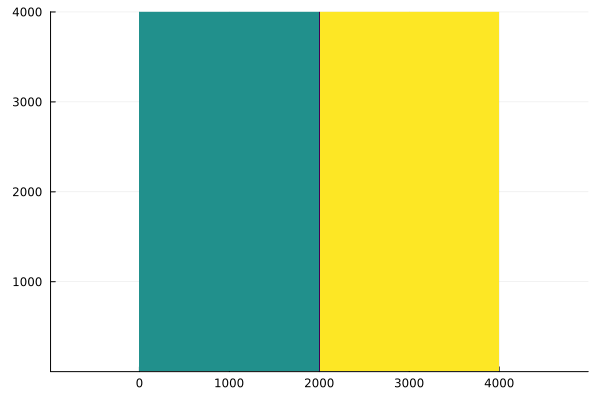

In [17]:
# Aplicamos la función al arreglo
toplot2 = convert_root2.(iterator2)

#heatmap
heatmap(toplot2, c=:viridis, aspect_ratio=1, color=:grays, legend=false)

In [18]:
# creamos una malla de números complejos, uso ; para evitar 
iniciales2 = [x + y*im for x in -4:0.001:4, y in -4:0.001:4];
w(x) = x - (x^4-4)/(4*x^3)#metodo de Newton_Raphson
iterator3 = deepcopy(iniciales2)
[iterator3 .= w.(iterator3) for i in 1:100]
iterator3

8001×8001 Matrix{ComplexF64}:
   4.3869+4.3869im        0.0+1.41421im  …    4.3869-4.3869im
  1.41421+0.0im       3.06839+3.06839im      1.41421+0.0im
  1.41421+0.0im       1.41421+0.0im          1.41421+0.0im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im  …       0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im  …       0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
         ⋮                               ⋱          ⋮
      0.0-1.41421im       0.0-1.41421im          0.0+1.41421im
      0.0-1.41421im       0.0-1.41421im  … 

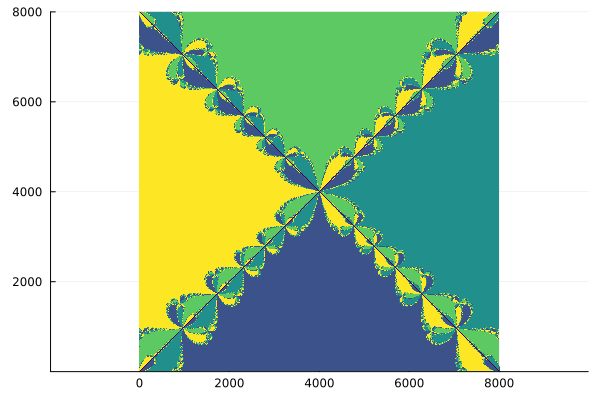

In [19]:
# Primero un vector que contenga las raices.
#raices = [x+im*y for x in -2:2:2, y in -2:2:2]
raices3 = [-sqrt(2),sqrt(2)*im,sqrt(2),-sqrt(2)*im]

# Ahora creamos una función que nos identifique las raices y asigne un cero cuando los valores no convergen.
function convert_root3(root)
    tolerance = 1e-6
    if abs(root-raices3[1]) < tolerance
        return 1
    elseif abs(root-raices3[2]) < tolerance
        return 2
    elseif abs(root-raices3[3]) < tolerance
        return 3
    elseif abs(root-raices3[4]) < tolerance
        return 4
    else
        return 0
    end
end

# Aplicamos la función al arreglo
toplot3 = convert_root3.(iterator3)

#heatmap
heatmap(toplot3, c=:viridis, aspect_ratio=1, color=:grays, legend=false)

In [20]:
# creamos una malla de números complejos, uso ; para evitar 
iniciales3 = [x + y*im for x in -2:0.001:2, y in -2:0.001:2];
z(x) = x - (x^3+1)/(3*x^2)#metodo de Newton_Raphson
iterator4 = deepcopy(iniciales3)
[iterator4 .= z.(iterator4) for i in 1:100]

100-element Vector{Matrix{ComplexF64}}:
 [-1.0 + 0.0im -1.0 + 0.0im … -1.0 + 0.0im -1.0 + 0.0im; -1.0 + 0.0im -1.0 + 0.0im … -1.0 + 0.0im -1.0 + 0.0im; … ; 0.5 - 0.8660254037844387im 0.5 - 0.8660254037844387im … 0.5 + 0.8660254037844387im 0.5 + 0.8660254037844387im; 0.5 - 0.8660254037844387im 0.5 - 0.8660254037844387im … 0.5 + 0.8660254037844387im 0.5 + 0.8660254037844387im]
 [-1.0 + 0.0im -1.0 + 0.0im … -1.0 + 0.0im -1.0 + 0.0im; -1.0 + 0.0im -1.0 + 0.0im … -1.0 + 0.0im -1.0 + 0.0im; … ; 0.5 - 0.8660254037844387im 0.5 - 0.8660254037844387im … 0.5 + 0.8660254037844387im 0.5 + 0.8660254037844387im; 0.5 - 0.8660254037844387im 0.5 - 0.8660254037844387im … 0.5 + 0.8660254037844387im 0.5 + 0.8660254037844387im]
 [-1.0 + 0.0im -1.0 + 0.0im … -1.0 + 0.0im -1.0 + 0.0im; -1.0 + 0.0im -1.0 + 0.0im … -1.0 + 0.0im -1.0 + 0.0im; … ; 0.5 - 0.8660254037844387im 0.5 - 0.8660254037844387im … 0.5 + 0.8660254037844387im 0.5 + 0.8660254037844387im; 0.5 - 0.8660254037844387im 0.5 - 0.8660254037844387im … 0

In [21]:
# Primero un vector que contenga las raices.
raices4 = [-1,1/2+(sqrt(3)/2)*im,1/2-(sqrt(3)/2)*im]

3-element Vector{ComplexF64}:
 -1.0 + 0.0im
  0.5 + 0.8660254037844386im
  0.5 - 0.8660254037844386im

In [22]:
# Ahora creamos una función que nos identifique las raices y asigne un cero cuando los valores no convergen.
function convert_root3(root)
    tolerance = 1e-6
    if abs(root-raices4[1]) < tolerance
        return 1
    elseif abs(root-raices4[2]) < tolerance
        return 2
    elseif abs(root-raices4[3]) < tolerance
        return 3
    else
        return 0
    end
end

convert_root3 (generic function with 1 method)

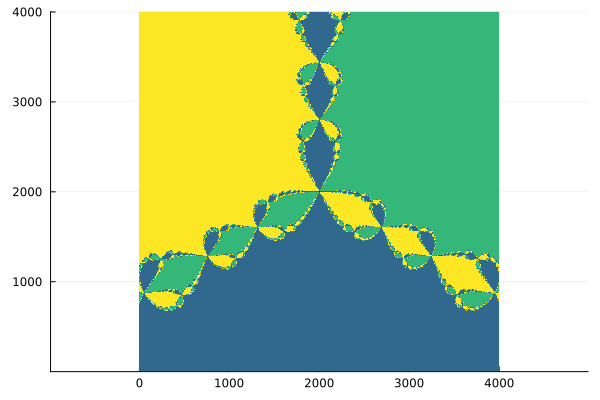

In [23]:
# Aplicamos la función al arreglo
toplot3 = convert_root3.(iterator4)

#heatmap
heatmap(toplot3, c=:viridis, aspect_ratio=1, color=:grays, legend=false)